<a href="https://colab.research.google.com/github/sirfindcent/food-vision/blob/main/Notebooks/03_food_vision_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 🍔👁 Food Vision Mini™

In the previous two notebooks ([transfer learning part 1: feature extraction](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb) and [part 2: fine-tuning](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb)) we've seen the power of transfer learning.


Now we know our **smaller modelling experiments** are **working**, it's time to step things up a notch with more data.

This is a common practice in machine learning and deep learning: get a model **working on a small** amount of **data** before scaling it up to a larger amount of data.

> 🔑 **Note:** The machine learning practitioners motto: "Experiment, experiment, experiment."

It's time to get closer to our Food Vision project coming to life. In this notebook we're going to **scale up** from using **10 classes** of the Food101 data to using **all of the classes** in the Food101 dataset.

Our goal is to **beat the original [Food101 paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf)'s results with 10% of data**.


In [ ]:
# Check to see if we're using GPU
!nvidia-smi

Wed Sep 13 18:46:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Creating helper functions
We've created a series of helper functions throughout the previous notebooks. Instead of rewriting them (tedious), we'll import the [`helper_functions.py`](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py) file from the GitHub repo.

In [ ]:
# Get helper functions file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-13 18:46:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-13 18:46:41 (95.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## 101 Food Classes : working with less data

In the original [Food101](https://www.kaggle.com/dansbecker/food-101) dataset there's 1000 images per class (750 of each class in the training set and 250 of each class in the test set), totalling 101,000 imags.

We could start modelling straight away on this large dataset but in the spirit of continually experimenting, we're going to see how our **previously working model's** go with **10% of the training data.**

This means for **each of the 101 food classes** we'll be building a model on **75 training image**s and **evaluating** it on **250 test images.**

## Downloading and preprocessing the data

Just as before we'll download a subset of the Food101 dataset which has been extracted from the original dataset (to see the preprocessing of the data check out the [Food Vision preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We download the data as a zip file so we'll use our `unzip_data()` function to unzip it.

In [ ]:
# Download and Unzip the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

# Set up directory
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2023-09-13 18:46:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.126.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  23.9MB/s    in 70s     

2023-09-13 18:47:55 (22.3 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
# How many images/classes are there
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/waffles'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/lobster_roll_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/poutine'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/omelette'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ravioli'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/red_velvet_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/lobster_bisque'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hot_and_sour_soup'.
There are 0 directories and 75 

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224,224)

# Preprocessing the data
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Train a big dog model with transfer learning on 10% of 101 food classes

To keep our experiments swift, we're going to start by using **feature extraction** transfer learning with a pre-trained model for **a few epochs** and then **fine-tune** for **a few more epochs.**

More specifically, our goal will be to see if we can **beat the baseline** from original [Food101 paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf) (50.76% accuracy on 101 classes) with 10% of the training data and the following modelling setup:

Here are the steps we're going to take:
* Create a ModelCheckpoint callback.
* Create a data augmentation layer to build data augmentation right into the model.
* A headless (no top layers) [`EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) architecture from `tf.keras.applications` as our **base model.**
* A `Dense` layer with **101 hidden neurons** (same as number of food classes) and **softmax activation** as the **output layer**
* Compile our model
* Fitting for 5 full passes on the training data while evaluating on 15% of the test data


Since we want our model to perform well on **unseen data** we'll set it to monitor the **validation accuracy metric** and **save the model weights** which score the **best** on that.

In [ ]:
# Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weigths_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

Checkpoint ready. Now let's create a small data augmentation model with the Sequential API. Because we're working with a reduced sized training set, this will help prevent our model from overfitting on the training data.

In [ ]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

## OLD
# # Setup data augmentation
# from tensorflow.keras.layers.experimental import preprocessing
# data_augmentation = Sequential([
#   preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
#   preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
#   preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
#   preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
#   preprocessing.RandomZoom(0.2), # randomly zoom into an image
#   # preprocessing.Rescaling(1./255) # keep for models like ResNet50V2, remove for EfficientNet
# ], name="data_augmentation")

Time to put together **a feature extraction transfer learning model** using [`tf.keras.applications.efficientnet.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) as our **base model.**

We'll import the **base model** using the parameter `include_top=False` so we can add on our **own output layers**.

In [ ]:
# Builiding the feature extraction model

# Setup the base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architechture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment the input
x = base_model(x, training=False) # pass the augment input to base model and `False` to turn on Inference Mode (weights that need to stay frozen, stay frozen)
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x) # average pooling the input to reduce dimensionality
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 1s 0us/step


![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/06-efficientnetb0-feature-extractor-with-dense-layer-on-top.png)
*A colourful figure of the model we've created with: 224x224 images as input, data augmentation as a layer, EfficientNetB0 as a backbone, an averaging pooling layer as well as dense layer with 10 neurons (same as number of classes we're working with) as output.*

Model created. Let's inspect it.

In [ ]:
# Get a summary of the model we've created
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pool_layer (Glo  (None, 1280)              0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                             

Looking good! Our Functional model has **5 layers** but each of those layers have **varying amounts of layers within them.**

Notice the number of trainable and non-trainable parameters. It seems the only **trainable parameters** are within the `output_layer` which is exactly what we're after with this first run of feature extraction; keep **all the learned patterns** in the base model (`EfficientNetb0`) **frozen** whilst allowing the model to **tune its outputs** to **our custom data.**

Time to compile and fit.

In [ ]:
# Compile the feature extraction model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, # fit for five epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training
                                           callbacks=[checkpoint_callback]) # save best model weights to file

Epoch 1/5
237/237 [==============================] - 141s 533ms/step - loss: 3.3698 - accuracy: 0.2723 - val_loss: 2.4483 - val_accuracy: 0.4701
Epoch 2/5
237/237 [==============================] - 102s 426ms/step - loss: 2.1881 - accuracy: 0.5018 - val_loss: 2.0494 - val_accuracy: 0.5037
Epoch 3/5
237/237 [==============================] - 94s 393ms/step - loss: 1.8234 - accuracy: 0.5669 - val_loss: 1.8315 - val_accuracy: 0.5479
Epoch 4/5
237/237 [==============================] - 92s 386ms/step - loss: 1.6086 - accuracy: 0.6070 - val_loss: 1.7603 - val_accuracy: 0.5535
Epoch 5/5
237/237 [==============================] - 58s 242ms/step - loss: 1.4399 - accuracy: 0.6488 - val_loss: 1.7672 - val_accuracy: 0.5403


Woah! It looks like our model is getting some impressive results, but remember, during training our model only evaluated on 15% of the test data. Let's see how it did on **the whole test dataset.**

In [ ]:
# Evaluate the on the whole test dataset
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 59s 75ms/step - loss: 1.5787 - accuracy: 0.5847


[1.5787084102630615, 0.5847128629684448]

Well it looks like **we just beat our baseline (the results from the original Food101 paper) with 10% of the data**! In under 5-minutes... that's the power of deep learning and more precisely, transfer learning: leveraging what one model has learned on another dataset for our own dataset.

How do the loss curves look?

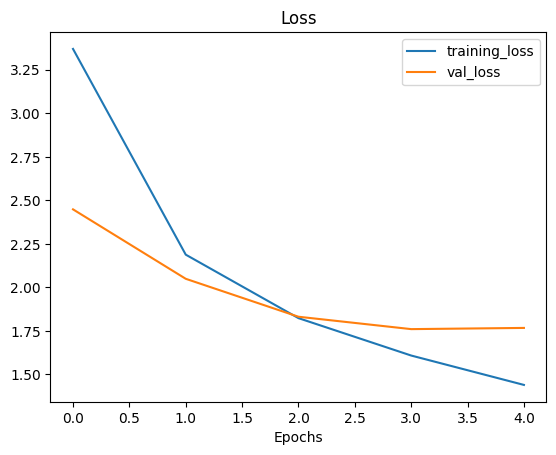

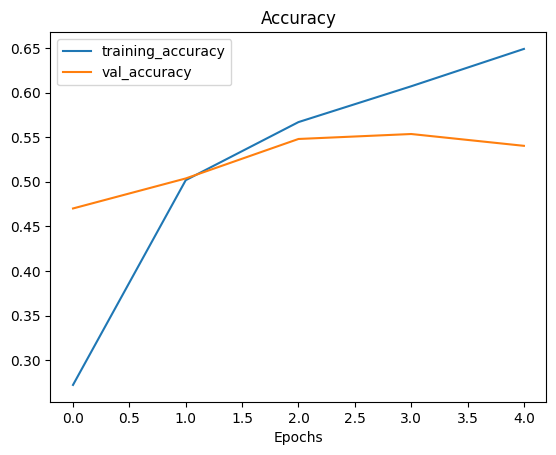

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

### Fine-tuning

Our **feature extraction** transfer learning model is **performing well**. Why don't we try to **fine-tune a few layers** in **the base model** and see if we gain any improvements?

The good news is, thanks to the `ModelCheckpoint` callback, we've got **the saved weights** of our already **well-performing model**, so if fine-tuning **doesn't add any benefits**, we can **revert back**.

To **fine-tune the base model** we'll first set its `trainable` attribute to `True`, **unfreezing** all of the frozen.

Then since we've got a relatively **small training dataset**, we'll **refreeze every layer** except for the last 5, making them trainable.

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

We just made a change to the layers in our model and what do we have to do every time we make a change to our model?

Recompile it.

Because we're fine-tuning, we'll use a **10x lower learning rate** to ensure the updates to the previous trained weights aren't too large.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/06-lowering-the-learning-rate.png)
*When fine-tuning and unfreezing layers of your pre-trained model, it's common practice to lower the learning rate you used for your feature extraction model. How much by? A 10x lower learning rate is usually a good place to to start.*

In [ ]:
# Recompile our model with lower learning (it's typically best practice to lower the learning rate when fine-tuning)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate lowered by 10x
              metrics=["accuracy"])

Model recompiled, how about we make sure the layers we want are trainable?

In [ ]:
# What layers in our model are trainable
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_avg_pool_layer True
output_layer True


In [ ]:
# Check which layers are trainable in our base model
for layer_number, layer in enumerate(model.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

Excellent! Time to fine-tune our model.

Another **5 epochs** should be **enough** to see whether any benefits come about (though we could always try more).

We'll start the training off where the feature extraction model **left off** using the `initial_epoch` parameter in the `fit()` function.

In [ ]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), this is the total numbers of epochs we're after (5 + 5 = 10)

history_all_classes_fine = model.fit(train_data_all_10_percent,
                                     epochs=fine_tune_epochs,
                                     initial_epoch=history_all_classes_10_percent.epoch[-1], # start from previous last epoch
                                     validation_data=test_data,
                                     validation_steps=int(0.15 * len(test_data)))

Epoch 5/10
237/237 [==============================] - 69s 250ms/step - loss: 1.2021 - accuracy: 0.6877 - val_loss: 1.7150 - val_accuracy: 0.5498
Epoch 6/10
237/237 [==============================] - 55s 229ms/step - loss: 1.0932 - accuracy: 0.7076 - val_loss: 1.6687 - val_accuracy: 0.5604
Epoch 7/10
237/237 [==============================] - 49s 207ms/step - loss: 1.0176 - accuracy: 0.7266 - val_loss: 1.6563 - val_accuracy: 0.5636
Epoch 8/10
237/237 [==============================] - 45s 189ms/step - loss: 0.9362 - accuracy: 0.7501 - val_loss: 1.6465 - val_accuracy: 0.5662
Epoch 9/10
237/237 [==============================] - 47s 197ms/step - loss: 0.8839 - accuracy: 0.7673 - val_loss: 1.6962 - val_accuracy: 0.5543
Epoch 10/10
237/237 [==============================] - 43s 177ms/step - loss: 0.8393 - accuracy: 0.7754 - val_loss: 1.6358 - val_accuracy: 0.5699


Once again, during training we were only evaluating on a small portion of the test data, let's find out how our model went on all of the test data.

In [ ]:
# Evaluate fine-tuned model on the whole test dataset
history_all_classes_10_percent.epoch[-1]
all_classes_10_percent_fine_tune_results = model.evaluate(test_data)

790/790 [==============================] - 62s 79ms/step - loss: 1.4805 - accuracy: 0.6075


Hmm... it seems like our model got **a slight boost** from fine-tuning.

Let's see the better picture by using our `compare_historys()` function.

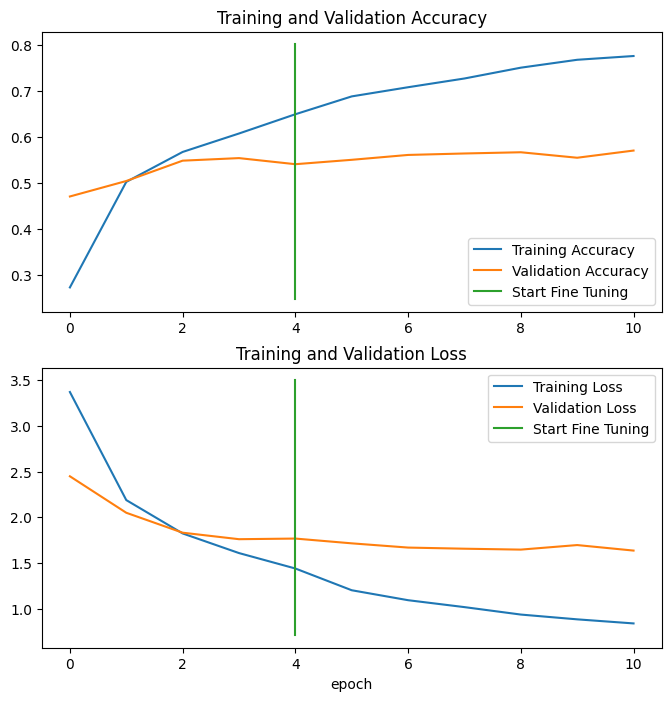

In [ ]:
# Compare the histories of feature extraction model with fine-tuning model
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_fine,
                 initial_epochs=5)

It seems that after fine-tuning, our model's **training** metrics **improved significantly** but **validation**, **not so much.** Looks like our model is starting to **overfit.**

This is okay though, its very often the case that **fine-tuning** leads to **overfitting** when the data a pre-trained model, **[ImageNet](http://www.image-net.org/index),** has been trained on is **similar** to your custom data, **our own data.**

In our case, our pre-trained model, `EfficientNetB0` **was trained** on [ImageNet](http://www.image-net.org/index) which contains many real life pictures of food just like our food dataset.

If **feature extraction** already **works well,** the improvements you see from fine-tuning **may not be as great** as if your dataset **was significantly different** from the data your base model was pre-trained on.

### Saving and Loading our model
To prevent having to retrain our model from scratch, let's save it to file using the [`save()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save) method.

In [ ]:
# Save our fine-tuning model
# model.save("/content/drive/MyDrive/ml-and-ds/Project/Classification/Food Vision/101_food_classes_10_percent_saved_big_dog_model")

## Evaluating the performance of the food vision model across all different classes
Let's dive a little deeper into our model's performance and get some visualizations going.

To do so, we'll **load in the saved model** and use it to make some **predictions on the test dataset.**

> 🔑 **Note:** Evaluating a machine learning model is as important as training one. Metrics can be **deceiving**. You should always visualize your model's performance on **unseen data** to make sure you aren't being fooled good looking training numbers.

In [ ]:
import tensorflow as tf

# Download pre-trained model from Google Storage (We utilze the best perfoming model that has been trained by @mrdbourke)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
unzip_data("/content/06_101_food_class_10_percent_saved_big_dog_model.zip")

# Note: loading a model will output a lot of 'WARNINGS', these can be ignored: https://www.tensorflow.org/tutorials/keras/save_and_load#save_checkpoints_during_training
# Load in saved model
model = tf.keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

--2023-09-13 19:11:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.126.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  23.4MB/s    in 1.9s    

2023-09-13 19:11:23 (23.4 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 [==============================] - 60s 74ms/step - loss: 1.8027 - accuracy: 0.6078


(1.8027204275131226, 0.6077623963356018)

Wonderful! It looks like our loaded model is performing just as well as it was before we saved it. Let's make some predictions.

### Making predictions with our trained model
To evaluate our trained model, we need to make some predictions with it and then compare those predictions to the test dataset.

In [ ]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1) # set verbosity to see how long is left

790/790 [==============================] - 66s 81ms/step


We just passed all of the test images to our model and asked it to make a prediction on what food it thinks is in each.

So if we had 25250 images in the test dataset, how many predictions do you think we should have?

In [ ]:
# How many predictions are there?
len(pred_probs)

25250

And if each image could be one of 101 classes, how many predictions do you think we'll have for each image?

In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(25250, 101)

In [ ]:
# Let's see what the first 10 predictions looks like
pred_probs[:10]

array([[5.9542052e-02, 3.5741975e-06, 4.1377045e-02, ..., 1.4138704e-09,
        8.3530496e-05, 3.0897565e-03],
       [9.6401680e-01, 1.3753246e-09, 8.4780250e-04, ..., 5.4286997e-05,
        7.8362065e-12, 9.8465647e-10],
       [9.5925868e-01, 3.2533771e-05, 1.4866969e-03, ..., 7.1891679e-07,
        5.4397577e-07, 4.0276118e-05],
       ...,
       [4.7313288e-01, 1.2931191e-07, 1.4805580e-03, ..., 5.9749995e-04,
        6.6969129e-05, 2.3469376e-05],
       [4.4571798e-02, 4.7265374e-07, 1.2258508e-01, ..., 6.3498542e-06,
        7.5318699e-06, 3.6778750e-03],
       [7.2438902e-01, 1.9249717e-09, 5.2310897e-05, ..., 1.2291410e-03,
        1.5792732e-09, 9.6395481e-05]], dtype=float32)

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [5.9542052e-02 3.5741975e-06 4.1377045e-02 1.0660552e-09 8.1614102e-09
 8.6639638e-09 8.0927339e-07 8.5652562e-07 1.9859106e-05 8.0977509e-07
 3.1727676e-09 9.8673900e-07 2.8532319e-04 7.8049028e-10 7.4230146e-04
 3.8916329e-05 6.4740352e-06 2.4977298e-06 3.7891194e-05 2.0678324e-07
 1.5538433e-05 8.1507318e-07 2.6230664e-06 2.0010719e-07 8.3827837e-07
 5.4215920e-06 3.7390882e-06 1.3150506e-08 2.7761532e-03 2.8051991e-05
 6.8561878e-10 2.5574898e-05 1.6688956e-04 7.6406692e-10 4.0453058e-04
 1.3150631e-08 1.7957357e-06 1.4448227e-06 2.3062896e-02 8.2466835e-07
 8.5365667e-07 1.7138624e-06 7.0525416e-06 1.8402128e-08 2.8553370e-07
 7.9483743e-06 2.0681448e-06 1.8525077e-07 3.3619699e-08 3.1522516e-04
 1.0410920e-05 8.5448096e-07 8.4741843e-01 1.0555463e-05 4.4094614e-07
 3.7404134e-05 3.5306119e-05 3.2488908e-05 6.7314984e-05 1.2852588e-08
 2.6219701e-10 1.0318126e-05 8.5743530e-05 1.

Our model outputs **a prediction probability array** (with C number of variables, where C is the number of classes) for each sample passed to the predict method.

And the **index** of the **highest prediction probability** can be considered what the model thinks is the most likely label.

We can find **the index of the maximum value** in **each prediction probability** tensor using the `argmax()` method.

In [ ]:
# Get the pred classes of each label
pred_classes = pred_probs.argmax(axis=1)
pred_classes

# How do they look
pred_classes[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

Beautiful! We've now got **the predicted class index** for **each of the samples** in our test dataset.

We'll be able to **compare these** to **the test dataset labels** to further evaluate our model.

To get the **test dataset labels** we can **unravel** our `test_data` object (which is in the form of a `tf.data.Dataset`) using the [`unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch) method.


Doing this will give us access to the images and labels in the test dataset. Since the **labels** are in **one-hot encoded format**, we'll take use the `argmax()` method to return the index of the label.

> 🔑 **Note:** This unravelling is why we `shuffle=False` when creating **the test data object.** Otherwise, whenever we **loaded** the test dataset, it would be **shuffled every time**.

In [ ]:

# To get our test labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 1, ... 0, 0] we want the index value where the `1` occurs

y_labels[:10] # look at the first 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Evaluating our model's predictions

One way to check if the model's predictions array is in the same order as our test labels array is to find the accuracy score.


In [ ]:
# TensorFlow accuracy score
loaded_loss, loaded_accuracy

(1.8027204275131226, 0.6077623963356018)

In [ ]:
# Let's try scikit-learn's accuracy score function and see what it comes up with
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.6077623762376237

In [ ]:
# Does the evaluate method compare to the Scikit-Learn measured accuracy?
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 2.0097978059574473e-08


Okay, it looks like our `pred_classes` array and `y_labels` arrays are in the right orders.

How about we get a little bit more visual with a confusion matrix?

To do so, we'll use our `make_confusion_matrix` function we created in a previous notebook.

### Evaluating with a confusion matrix

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
# Get a list of class names
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20)

Woah! Now that's a big confusion matrix. It may look a little daunting at first but after zooming in a little, we can see how it gives us **insight** into which classes its getting "confused" on.

The good news is, the **majority** of the predictions are **right down the top left** to **bottom right diagona**l, meaning they're **correct.**

It looks like the model gets **most confused** on classes which look **visualy similar**, such as predicting `filet_mignon` for instances of `pork_chop` and `chocolate_cake` for instances of `tiramisu`.


### Evaluating with a classification report
Since we're working on a classification problem, we can further evaluate our model's predictions using Scikit-Learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.


Scikit-learn has a helpful function for acquiring many different classifications metrics per class (e.g precision, recall and F1) called [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), let's try it out


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

In [ ]:
# See the most wrong predictions
class_names[63]

'macarons'

The `classification_report()` outputs the precision, recall and f1-score's per class.

A reminder:
* **Precision** - Proportion of true positives over total number of samples. **Higher precision** leads to **less false positives** (model predicts 1 when it should've been 0).
* **Recall** - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). **Higher recall leads** to **less false negatives.**
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.

The above output is helpful but with so many classes, it's a bit hard to understand.

Let's see if we make it easier with the help of a visualization.

First, we'll get the output of `classification_report()` as a dictionary by setting `output_dict=True`.

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.29310344827586204,
  'recall': 0.204,
  'f1-score': 0.24056603773584903,
  'support': 250},
 '1': {'precision': 0.5088235294117647,
  'recall': 0.692,
  'f1-score': 0.5864406779661017,
  'support': 250},
 '2': {'precision': 0.5625,
  'recall': 0.648,
  'f1-score': 0.6022304832713754,
  'support': 250},
 '3': {'precision': 0.7415730337078652,
  'recall': 0.528,
  'f1-score': 0.616822429906542,
  'support': 250},
 '4': {'precision': 0.7346938775510204,
  'recall': 0.432,
  'f1-score': 0.544080604534005,
  'support': 250},
 '5': {'precision': 0.34177215189873417,
  'recall': 0.54,
  'f1-score': 0.41860465116279066,
  'support': 250},
 '6': {'precision': 0.6677966101694915,
  'recall': 0.788,
  'f1-score': 0.7229357798165138,
  'support': 250},
 '7': {'precision': 0.8197424892703863,
  'recall': 0.764,
  'f1-score': 0.7908902691511386,
  'support': 250},
 '8': {'precision': 0.4025974025974026,
  'recall': 0.372,
  'f1-score': 0.3866943866943867,
  'support': 250},
 '9

Alright, there's still a fair few values here, how about we narrow down?

Since the f1-score combines **precision and recall** in **one metric**, let's focus on that.

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k,v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]

class_f1_scores

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

In [ ]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name" : list(class_f1_scores.keys()),
                          "f1-score" : list(class_f1_scores.values())})

# Sorting the dataframe values based on f1-score
f1_scores = f1_scores.sort_values("f1-score", ascending=False)


In [ ]:
f1_scores[:10]

class_name  f1-score
33              edamame  0.937143
63             macarons  0.895397
75                  pho  0.866538
91  spaghetti_carbonara  0.847656
69              oysters  0.834008
68          onion_rings  0.832618
65              mussels  0.820000
88        seaweed_salad  0.813008
64            miso_soup  0.812977
45        frozen_yogurt  0.811429

Now we're talking! Let's finish it off with a nice horizontal bar chart.



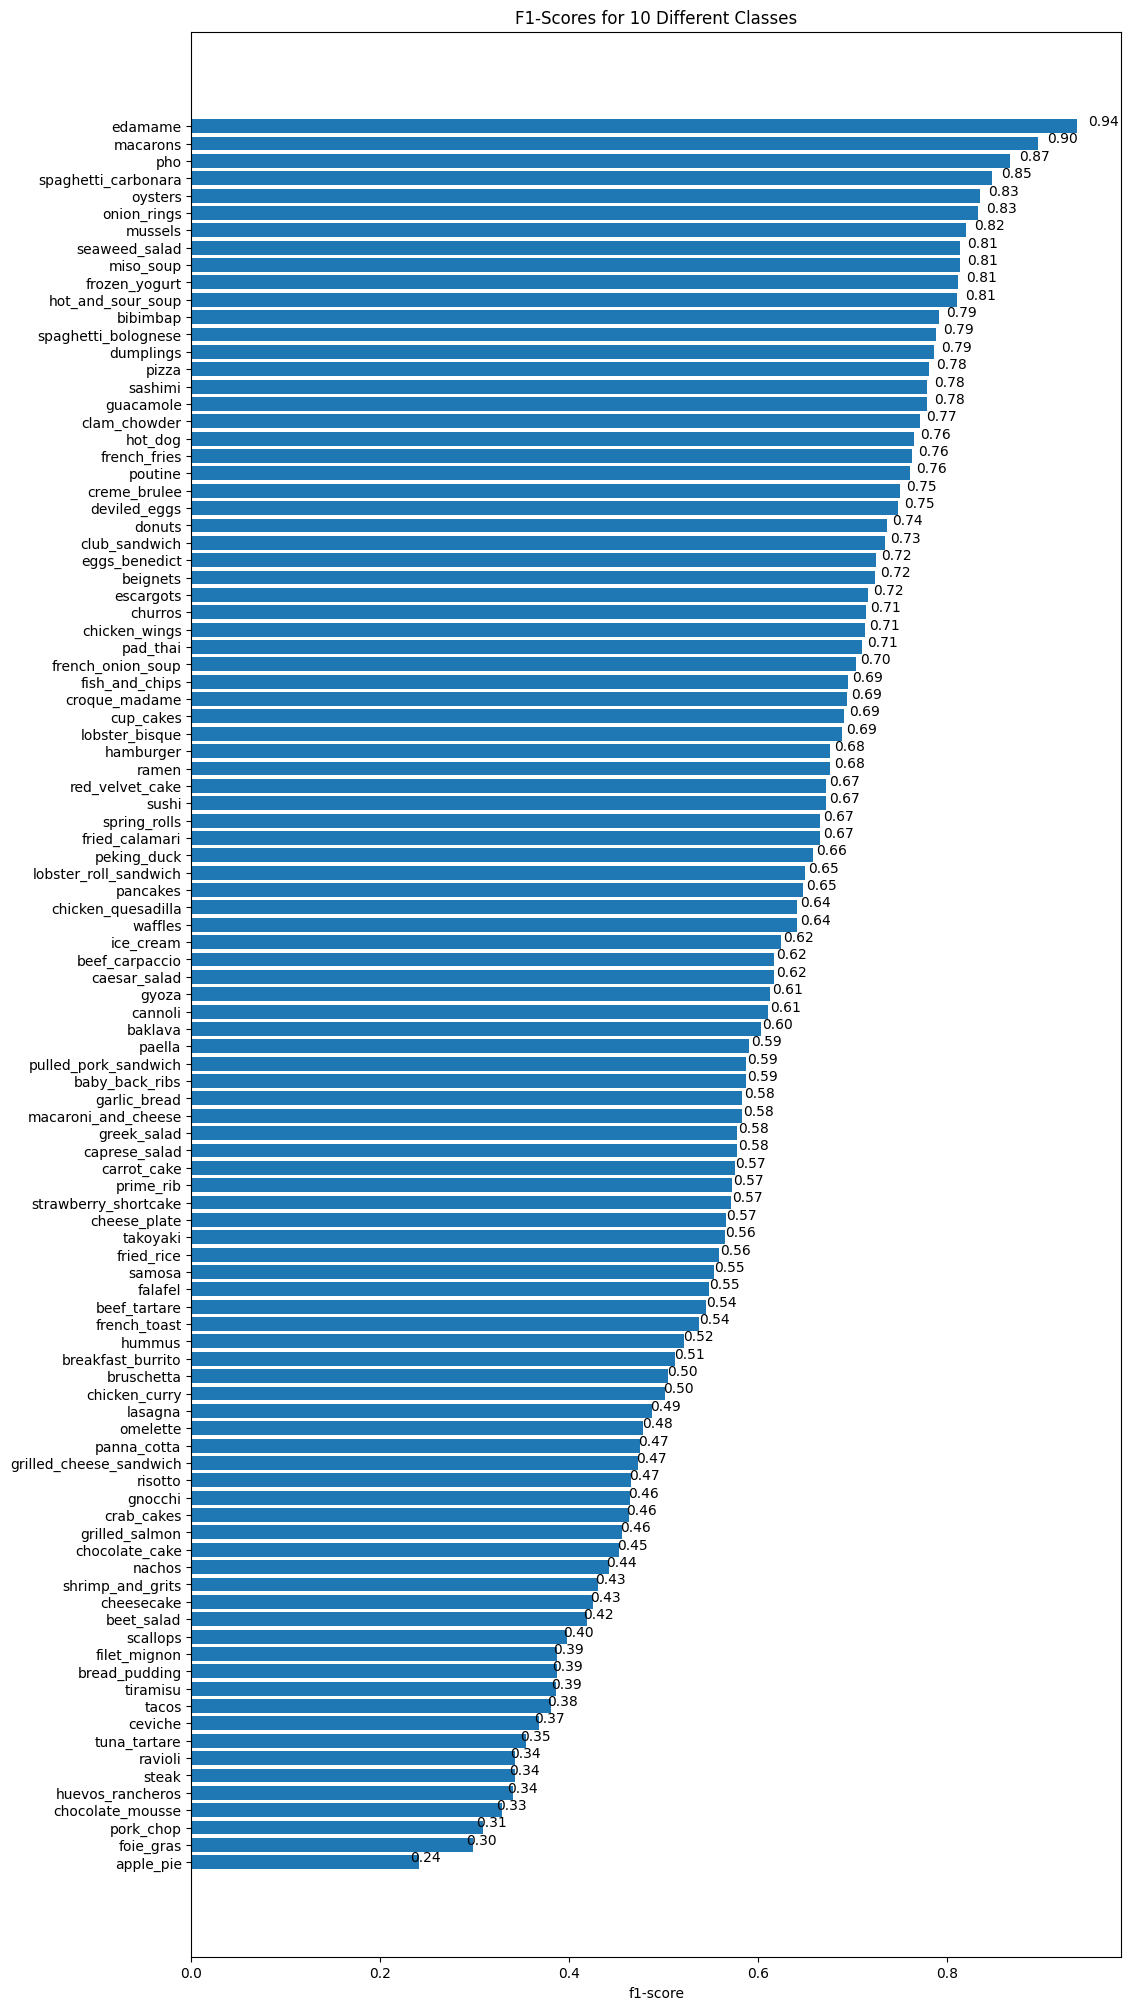

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

A few moments ago we only had **an accuracy score** but now we've got an indiciation of how well our model is **performing** on **a class by class basis.**

It seems like our model performs **fairly poorly on classes** like `apple_pie` and `ravioli` while for classes like `edamame` and `pho` the performance is **quite outstanding.**

Findings like these give us **clues** into where we could go next with our experiments. Perhaps we may **have to collect more data on poor performing classes** or perhaps **the worst performing classes** are **just hard** to make predictions on.

### Visualizing predictions on test images

You can look at all the metrics you want but until you've **visualized some predictions**, you won't really know how your model is performing.

As it stands, our model can't just predict on any image of our choice. The image first has to be loaded into a tensor.

So to begin predicting on any given image, we'll create a function to load an image into a tensor.

Specifically, it'll:
* Read in a target image filepath using [`tf.io.read_file()`](https://www.tensorflow.org/api_docs/python/tf/io/read_file).
* Turn the image into a `Tensor` using [`tf.io.decode_image()`](https://www.tensorflow.org/api_docs/python/tf/io/decode_image).
* Resize the image to be the same size as the images our model has been trained on (224 x 224) using [`tf.image.resize()`](https://www.tensorflow.org/api_docs/python/tf/image/resize).
* Scale the image to get all the pixel values between 0 & 1 if necessary.

In [ ]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads an image from filename, turn it into tensors, reshapes
  into specified shape (img_shape, img_shape, colour_channels=3).

  Args:
    filename (str): path to target image
    img_shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    Image tensor of shape (img_shape, img_shape, 3)
  """

  # Reads an image from filename
  img =  tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.image.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Scale? Yes/no
  if scale:
    img = img/255.

  return img

Image loading and preprocessing function ready.

Now let's write some code to:

1. Load a few random images from the test dataset.
2. Make predictions on them.
3. Plot the original image(s) along with the model's predicted label, prediction probability and ground truth label.

1/1 [==============================] - 0s 25ms/step


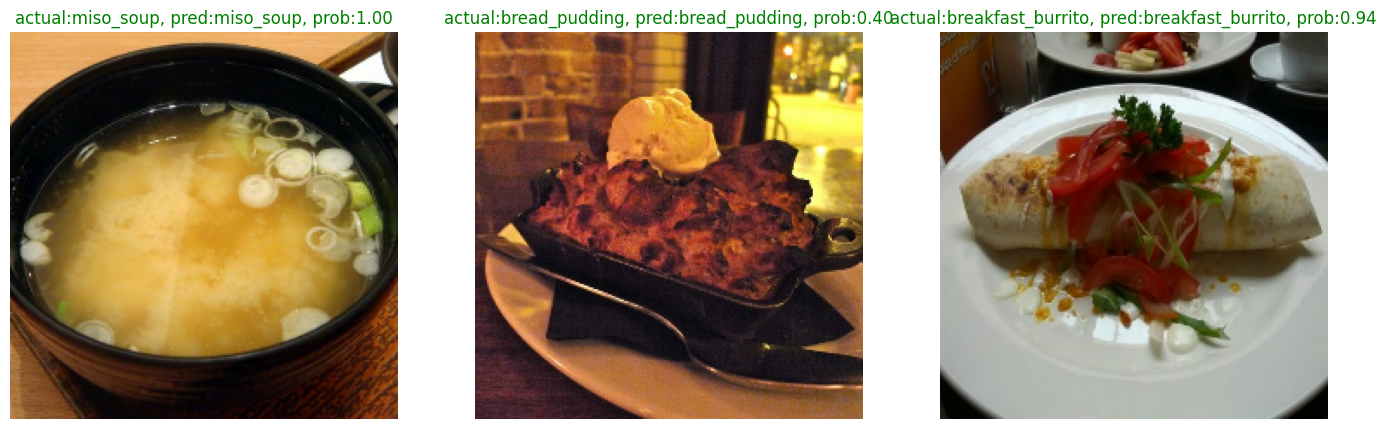

In [ ]:
# Visualize random image with its perdictions
import os
import random

plt.figure(figsize=(17, 10))

for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = test_dir  + class_name
  imagename = random.choice(os.listdir(test_dir + class_name))
  filepath = test_dir + class_name + "/" + imagename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # shape = (224, 224, 3)
  img_expanded = tf.expand_dims(img, axis=0) # expand into (1, 224, 224, 3)
  pred_prob  = model.predict(img_expanded) # get prediction probabilities array
  pred_class = class_names[pred_prob.argmax()] # get highest prediction probability index and match it to class_names list

  # Plot the images

  plt.subplot(1, 3, i+1)
  plt.imshow(tf.cast(img, "int32")) # matplotlib require int dtype image for unscale image
  if class_name == pred_class : # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual:{class_name}, pred:{pred_class}, prob:{pred_prob.max():.2f}", c=title_color)
  plt.axis(False)

### Finding the most wrong predictions

It's a good idea to go through **at least 100+** random instances of your model's predictions to **get a good feel for how it's doing.**

After a while you might notice the model predicting on some images with a very high prediction probability, meaning it's **very confident** with its prediction but still **getting the label wrong.**

These **most wrong** predictions can help to give further insight into your model's performance.

In [ ]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
# 2. Create a dataframe out of current prediction data for analysis
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0      52   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0      80   
4  b'/content/101_food_classes_10_percent/test/ap...       0      79   

   pred_conf y_true_classname      y_pred_classname  
0   0.847418        apple_pie                 gyoza  
1   0.964017        apple_pie             apple_pie  
2   0.959259        apple_pie             apple_pie  
3   0.658607        apple_pie  pulled_pork_sandwich  
4   0.367901        apple_pie             prime_rib

In [ ]:
# 3. Find out in our DataFrame which predictions are wrong
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]

In [ ]:
pred_df[:5]

img_path  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0      52   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0      80   
4  b'/content/101_food_classes_10_percent/test/ap...       0      79   

   pred_conf y_true_classname      y_pred_classname  pred_correct  
0   0.847418        apple_pie                 gyoza         False  
1   0.964017        apple_pie             apple_pie          True  
2   0.959259        apple_pie             apple_pie          True  
3   0.658607        apple_pie  pulled_pork_sandwich         False  
4   0.367901        apple_pie             prime_rib         False

And now since we know which predictions were right or wrong and along with their prediction probabilities, how about we get the 100 "most wrong" predictions by sorting for wrong predictions and descending prediction probabilties?

In [ ]:
# 4. Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values(by="pred_conf", ascending=False)[:100]
top_100_wrong.head()

img_path  y_true  y_pred  \
21810  b'/content/101_food_classes_10_percent/test/sc...      87      29   
231    b'/content/101_food_classes_10_percent/test/ap...       0     100   
15359  b'/content/101_food_classes_10_percent/test/lo...      61      53   
23539  b'/content/101_food_classes_10_percent/test/st...      94      83   
21400  b'/content/101_food_classes_10_percent/test/sa...      85      92   

       pred_conf       y_true_classname y_pred_classname  pred_correct  
21810   0.999997               scallops        cup_cakes         False  
231     0.999995              apple_pie          waffles         False  
15359   0.999988  lobster_roll_sandwich        hamburger         False  
23539   0.999987   strawberry_shortcake  red_velvet_cake         False  
21400   0.999981                 samosa     spring_rolls         False

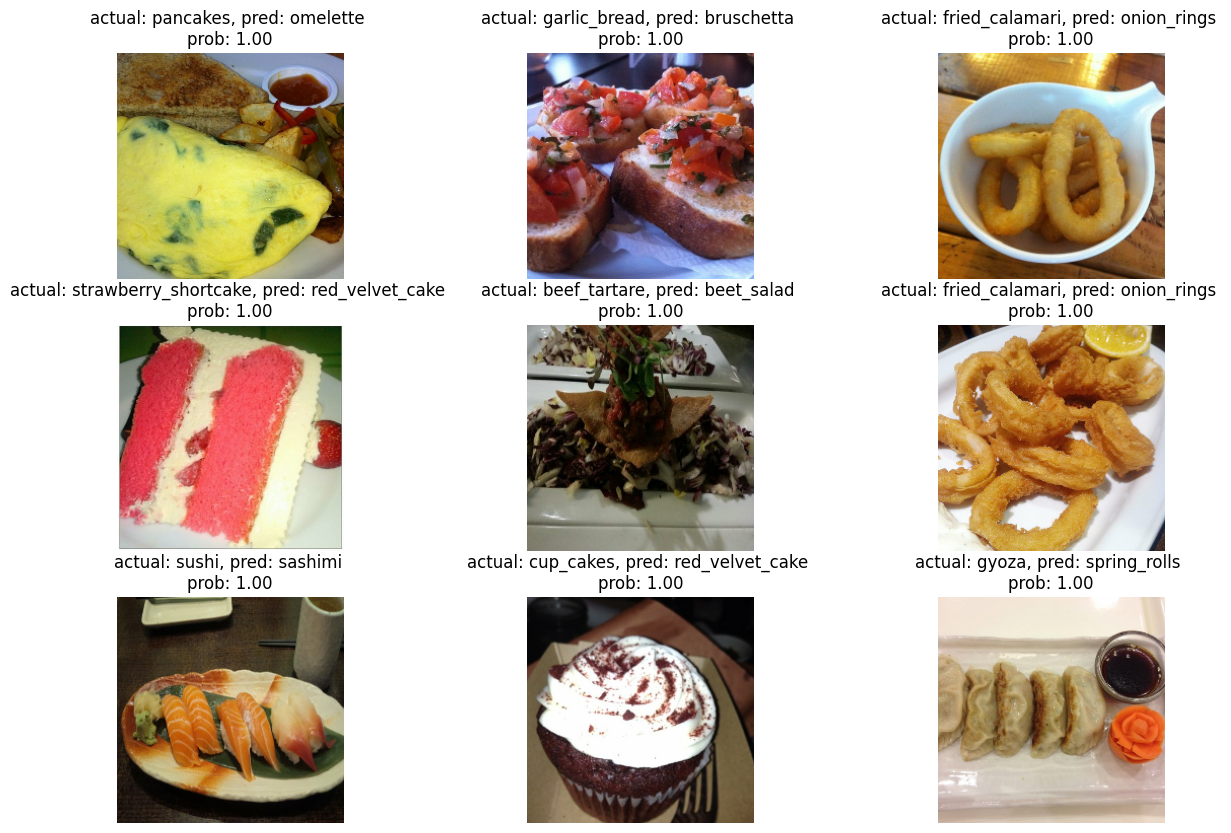

In [ ]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

Going through the model's most wrong predictions can usually help figure out a couple of things:
* **Some of the labels might be wrong** - If our model ends up being good enough, it may actually learning to predict very well on certain classes. This means some images which the model **predicts the right label** may show up **as wrong** if the **ground truth label is wrong.** If this is the case, we can often use our **model** to help us **improve the labels** in our dataset(s) and in turn, potentially making future models better. This process of using **the model to help improve labels** is often referred to as [**active learning**](https://blog.scaleway.com/active-learning-some-datapoints-are-more-equal-than-others/).
* **Could more samples be collected?** - If **there's a recurring pattern** for **a certain class** being poorly predicted on, perhaps it's a good idea to **collect more samples** of that particular class in different scenarios to improve further models.

## Test out the big dog model on our custom images
## Test out the big dog model on test images as well as custom images of food

So far we've visualized some our model's predictions from the test dataset but it's time for the real test: using our model to make predictions on our own custom images of food.

For this you might want to upload your own images to Google Colab or by putting them in a folder you can load into the notebook.

In my case, we're going to use the small dataset of food images that has been prepared by mrdbourke.

Let's download them and unzip them.

In [ ]:
# Get custom images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data("custom_food_images.zip")

--2023-09-13 19:15:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.250.153.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  12.2MB/s    in 1.0s    

2023-09-13 19:15:40 (12.2 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



Wonderful, we can load these in and turn them into tensors using our `load_and_prep_image()` function but first we need a list of image filepaths.

In [ ]:
# Get the custom images filepaths
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/steak.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/pizza-dad.jpeg']

Now we can use similar code to what we used previously to load in our images, make a prediction on each using our trained model and then plot the image along with the predicted class.

1/1 [==============================] - 0s 24ms/step


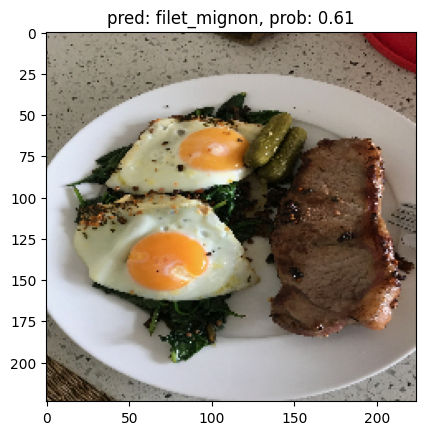

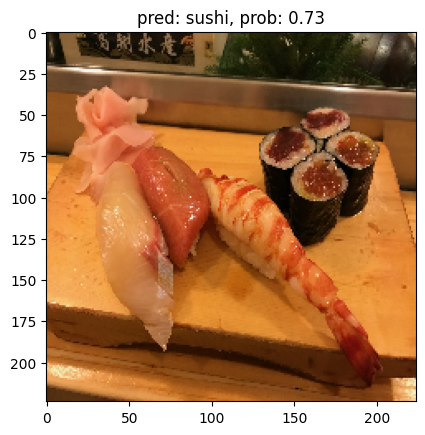

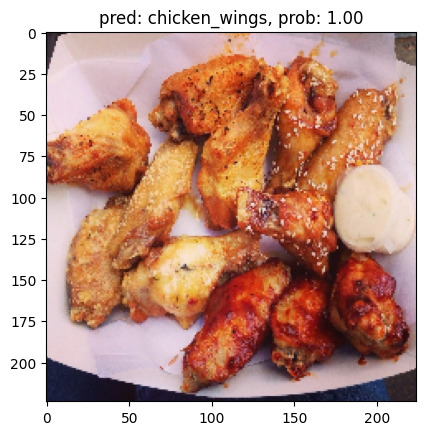

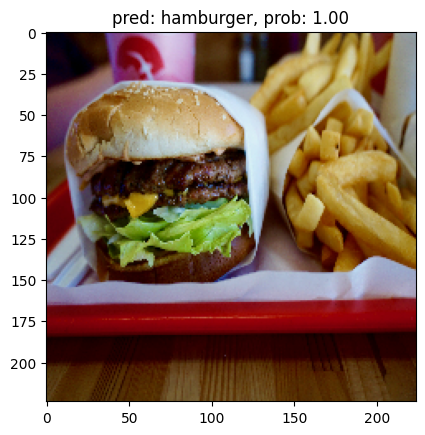

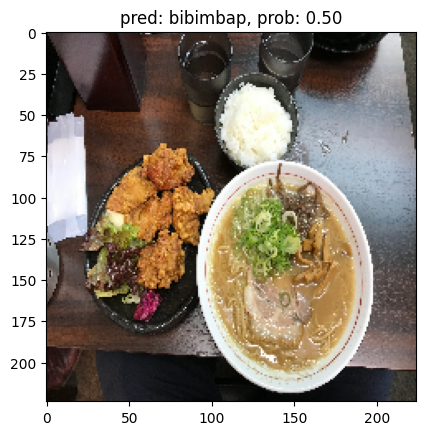

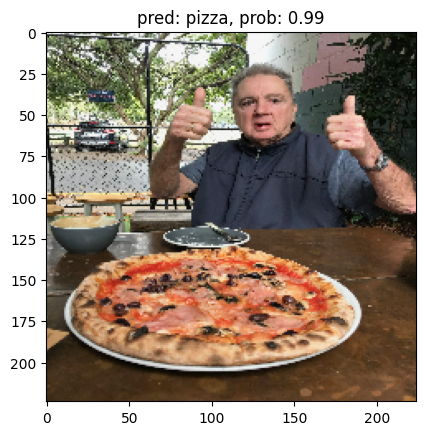

In [ ]:
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # don't need to scale for our EfficientNetB0 model
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [1,224,224,3] (same shape as model was trained on)
  pred_class = class_names[pred_prob.argmax()] # get the index of highest prediction probability

  # Plot the appropiate information
  plt.figure()
  plt.imshow(tf.cast(img, "int32")) # matplotlib require a int32 type for unscale tensor
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")

Two thumbs up! How cool is that?! Our Food Vision model has come to life!

Seeing a machine learning model work on a premade test dataset is cool but seeing it work on your own data is mind blowing.

And guess what... our model got these **incredible results** (10%+ better than the baseline) with **only 10%** of the training images.

I wonder what would happen if we **trained a model** with **all of the data** (100% of the training data from Food101 instead of 10%)?